### 词嵌入（word embedding）

one-hot编码的特征：
- 二进制的、稀疏的（绝大部分元素都是 0）
- 维度很高（维度大小等于词表中的单词个数）
- 硬编码（信息的关联度几乎为0）

词嵌入编码的特征：
-  密集 （更多的信息塞入更低的维度）
- 维度较低（ 256、512 或 1024）
- 从数据中学习得到（信息的关联度高）

所以词嵌入的向量编码具有更多的信息。

![两种编码的对比](imgs/02.jpg)

#### 获得词嵌入编码的两种方法

- 在完成主任务（比如文档分类或情感预测）的同时学习词嵌入。，一开始是随机的词向量，然后对这些词向量进行学习，其学习方式与学习神经网络的权重相同；
- 预训练词嵌入（pretrained word embedding）,利用预先计算好词嵌入加载到自己的模型中。

###  利用 Embedding 层学习词嵌入

所谓的词嵌入，就是将单个的词与一个密集向量进行关联。这里的密集向量也就是上面提到的维度数，例如256，512等等向量。这里就是需要我们怎么来定义这个密集向量，说的更加简单点：这个向量空间由什么组成，怎么组成？

再解释这个问题之前，我们先来理解一下，词向量之间的关系如何来表示。

#### 词向量之间的几何关系

每个词与词之间是存在一定的语义逻辑关系的，比如 cat（猫）、dog（狗）、wolf（狼）
和 tiger（虎），这四个词语。
- 从 cat 到 tiger 的向量与从 dog 到 wolf 的向量相等，这个向量可以被解释为“从宠物到野生动物”向量
- 从 dog 到 cat 的向量与从 wolf 到 tiger 的向量也相等，它可以被解释为“从犬科到猫科”向量。

词嵌入的作用是将人类的语言映射到几何空间中，词与词之间的语义关系就是通过几何距离来表示。例如：表示不同事物的词被嵌入到相隔很远的点，而相关的词则更加靠近（“花” 与“植物”，“狗” 与 “动物” 靠的近一些），除了距离以外，还有嵌入空间中的特定方向也是有意义。例如上面的哪个例子。

真实的词嵌入空间，通常是由一些比较综合的词组成的向量空间，例如：“性别”向量和“复数”向量，但是再人类语言中，无法完美的映射一个理想的词嵌入空间，因为语言和文化不一样。这里如果一定要找一个合理的词嵌入空间的化，要根据具体的任务来获得。比如英语电影评论情感分析模型的完美词嵌入空间，与科技论文的模型的完美词嵌入空间就不一样。  

合理的做法是对每个新任务都学习一个新的嵌入空间，反向传播让这种学习变得很简单。通过Keras API可以很方便得到。

####  keras 中 Embedding 层的理解

 Embedding 层理解为一个字典，将整数索引（表示特定单词）映射为密集向量。
 它接收整数作为输入，并在内部字典中查找这些整数，然后返回相关联的向量。
 ![Embedding 层](imgs/03.jpg)
 
 Embedding 层的输入是一个二维整数张量，其形状为 (samples,  sequence_length)，每 个 元 素 是 一 个 整 数 序 列。   
  对 于 前 一 个 例 子 中 的Embedding 层，你可以输入形状为 (32,  10)（32 个长度为 10 的序列组成的批量）或 (64, 15)（64 个长度为 15 的序列组成的批量）的批量。  
  
这 个 Embedding 层 返 回 一 个 形 状 为 (samples,  sequence_length,  embedding_dimensionality) 的三维浮点数张量   

将一个 Embedding 层实例化时，它的权重（即标记向量的内部字典）最开始是随机的，与其他层一样。在训练过程中，利用反向传播来逐渐调节这些词向量，改变空间结构以便下游模型可以利用。


In [11]:
# 将一个 Embedding 层实例化
from keras.layers import Embedding
#  两个参数：
# 标记的个数（这里是 1000，即最大单词索引 +1）
# 嵌入的维度（这里是 64）
embedding_layer = Embedding(1000,64)


####   IMDB 电影评论情感预测模型

- 准备数据：
    - 将电影评论限制为前 10 000 个最常见的单词，
    - 评论长度限制为20个单词，
    - 每个单词学习一个8维度向量
- 将输入的整数序列（二维整数张量）转换为嵌入序列（三维浮点数张量）
- 训练一个 Dense 层用于分类

如下结果，得到的验证精度约为 76%，考虑到仅查看每条评论的前 20 个单词

In [23]:
from keras.datasets import imdb
# from keras.layers import preprocessing 好像有问题
from keras import preprocessing

 # 作为特征的单词个数,前 10 000 个最常见的单词
max_features = 10000 
# 评论长度限制为20个单词,在这么多单词后截断文本
maxlen = 20

# 将数据加载为整数列表
(x_train,y_train),(x_test,y_test) = imdb.load_data(
    num_words=max_features) 

print("做pad之前：",x_train.shape)

#将整数列表转换成形状为(samples, maxlen) 的二维整数张量
# 使用pad_sequences函数将数据截取成相同长度的函数
# 第一个参数：sequences: List of lists, where each element is a sequence.
# 第二个参数：maxlen: Int, maximum length of all sequences.
# 返回值：x: Numpy array with shape (len(sequences), maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

print("做pad之后：",x_train.shape)

做pad之前： (25000,)
做pad之后： (25000, 20)


In [24]:
# 在 IMDB 数据上使用 Embedding 层和分类器
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
# 指定 Embedding 层的最大输入长度，以便后面将嵌入输入展平。
# Embedding 层激活的形状为 (samples, maxlen, 8)
model.add(Embedding(10000,8,input_length = maxlen))

# 将三维的嵌入张量展平成形状为 (samples, maxlen * 8) 的二维张量
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [25]:
# 编译模型
model.compile(optimizer='rmsprop',
            loss = 'binary_crossentropy',
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 开始训练
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 241us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 110us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 98us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 97us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 99us/step - loss

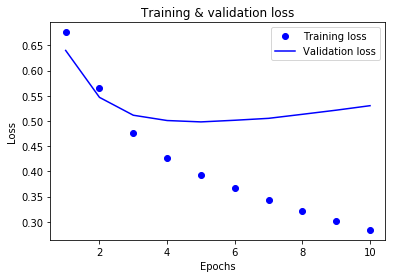

In [28]:
# 绘制训练损失贺验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training & validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

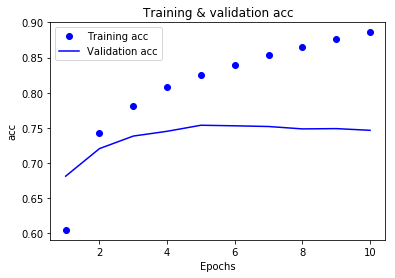

In [29]:
# 绘制训练精度和验证集的精度
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training & validation acc")
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()